# Horizontal Sum Supply

In [2]:
# HIDDEN
import qgrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

This Notebook will demonstrate using QGrid - a way to interact with the data in a table.  Unfortunately Qgrid works with Pandas, so this Notebook uses a pandas Dataframe as its data source. Here is the outline for this notebook:
1. First we will read in a dataframe with some Supply functions for 3 firms, they have 3 quantities they will supply at three possible prices
2. In the first part Firm C is not producing anything , and production is set at zero
3. We will create a market supply by summing the supply from Firm A and Firm B
4. When the widget is created - you can enter and edit the values of the cells


## DataFrame Widget##

In [3]:
df_Market = pd.DataFrame({
    'Price' : [5, 10, 15],
    'A' : [20, 30, 40],
    'B' : [25, 35, 50], 
    'C' : [0, 0, 0],  })

df_Market['Total_Supply_ABC'] = df_Market['A'] + df_Market['B']+ df_Market['C']

qgrid_widget = qgrid.show_grid(df_Market, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

So go in and play around with different values for firm C. Try $[12,17,55]$ or $[0,25,55]$.

What do we have to assume about C? It has to increase or stay the same as Price increases.

*Note - if you manipulate the data in the Qgrid widget - you need to save the dataframe - here we rename it as `updated_df`*

In [4]:
updated_df=qgrid_widget.get_changed_df()
updated_df['Total_Supply_ABC'] = updated_df['A'] + updated_df['B']+ updated_df['C']
updated_df

,A,B,C,Price,Total_Supply_ABC
0,20,25,0,5,45
1,30,35,0,10,65
2,40,50,0,15,90


## Graphing##
Now we are going to graph the individual supply curves of each firm, alongside the total Supply to crease a Market Supply

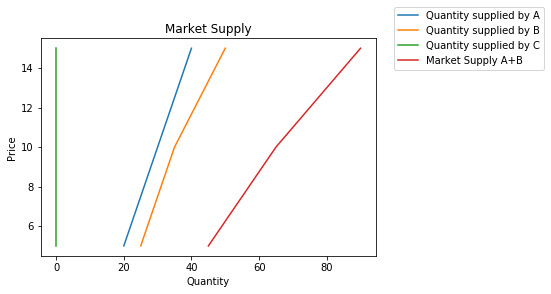

In [5]:
# NO CODE
ax = plt.gca()
updated_df.plot(kind='line', y='Price', x='A', ax=ax)
updated_df.plot(kind='line', y='Price', x='B', ax=ax)
updated_df.plot(kind='line', y='Price', x='C', ax=ax)
updated_df.plot(kind='line', y='Price', x='Total_Supply_ABC', ax=ax)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Market Supply')
plt.legend(("Quantity supplied by A","Quantity supplied by B","Quantity supplied by C", "Market Supply A+B"), bbox_to_anchor=(1.04,1), loc="center left")

plt.show()

## Thought Questions ##

1.  Can the individual supply lines cross?

2. Can individual supply schedules = 0, at a lower price?

3. Can lines bend backwards?


##  Market Analysis 

### Supply, Demand, and New Market Entrant
Let's start again and add in
1. A demand function
2. A comparison of the supply with just firms A and B to with a third firm C
3. What happens to equilibrium Price and Quantity?

In [6]:
qgrid_widget = qgrid.show_grid(updated_df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [7]:
updated_df=qgrid_widget.get_changed_df()
updated_df['Total_Supply_AB'] = updated_df['A'] + updated_df['B'] 
updated_df['Total_Supply_ABC'] = updated_df['A'] + updated_df['B'] + updated_df['C']

Lets specify a Demand curve - prices and quantities - so we need Quantities demanded that correspond to a price of [5,10,15]

In [10]:
Demand = [100,75,50]
updated_df['Demand'] = Demand
updated_df

,A,B,C,Price,Total_Supply_ABC,Total_Supply_AB,Demand
0,20,25,0,5,45,45,100
1,30,35,0,10,65,65,75
2,40,50,0,15,90,90,50


Now let's visualize the market supply.

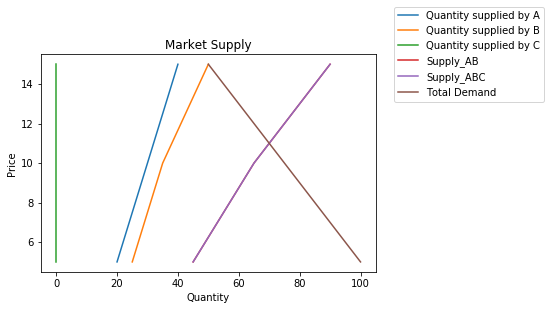

In [11]:
# NO CODE
ax = plt.gca()
updated_df.plot(kind='line', y='Price', x='A', ax=ax)
updated_df.plot(kind='line', y='Price', x='B', ax=ax)
updated_df.plot(kind='line', y='Price', x='C', ax=ax)
updated_df.plot(kind='line', y='Price', x='Total_Supply_AB', ax=ax)
updated_df.plot(kind='line', y='Price', x='Total_Supply_ABC', ax=ax)
updated_df.plot(kind='line', y='Price', x='Demand', ax=ax)

plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Market Supply')
plt.legend(("Quantity supplied by A","Quantity supplied by B","Quantity supplied by C", "Supply_AB","Supply_ABC", "Total Demand" ), bbox_to_anchor=(1.04,1), loc="center left")

plt.show()

## More Thought Questions

1. What happens to the market price and quantity?  Can you eyeball the changes?
2. What happens to each individual producer - can you tell from this graph?
3. Should firm C enter the market?